In [11]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import bisect
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def init_ba_network(m0):
    # Initialize a network with m0 nodes and fully connected
    G = nx.complete_graph(m0)
    return G

In [3]:
def barabasi_albert_algorithm(m, num_nodes):
    G = nx.Graph()
    # Initialize the network with m nodes connected to each other
    for i in range(m):
        for j in range(i + 1, m):
            G.add_edge(i, j)

    # Degrees of initial nodes
    degrees = np.zeros(m, dtype=int)

    # Add nodes incrementally with preferential attachment
    for i in range(m, num_nodes):
        # Calculate probabilities for connecting to existing nodes based on their degree
        if np.sum(degrees) == 0:
            # Special case: all degrees are zero
            node_probs = np.ones_like(degrees) / len(degrees)
        else:
            node_probs = degrees / np.sum(degrees)

        # Select m nodes to connect to based on preferential attachment
        selected_nodes = np.random.choice(np.arange(i), size=m, replace=False, p=node_probs)

        # Add new node
        G.add_node(i)

        # Connect the new node to selected nodes
        for node in selected_nodes:
            G.add_edge(i, node)
            # Update degrees of selected nodes
            degrees[node] += 1

        # Update degree of the new node
        degrees = np.append(degrees, m)

    return G

In [4]:
m0 = 7  # Initial number of nodes
m = 3   # Number of edges to attach from a new node to existing nodes

# Initialize the network

# Generate the scale-free network using the BA algorithm
G1 = barabasi_albert_algorithm( m, 10000)

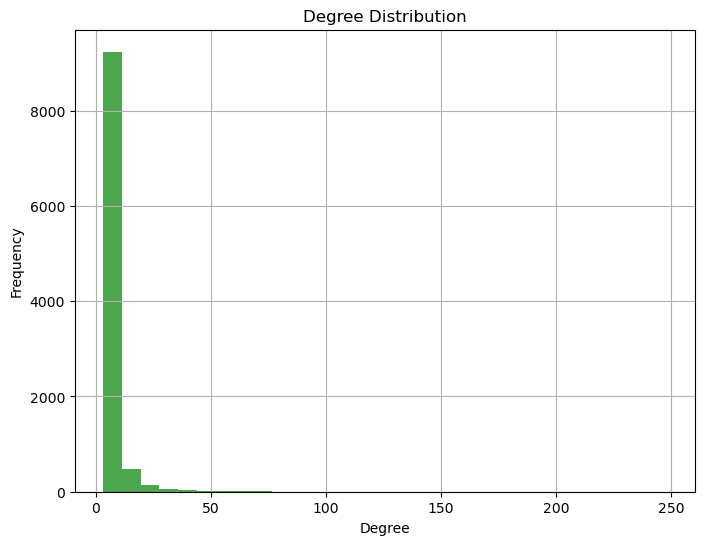

Maximum Degree: 248
Minimum Degree: 3
Average Degree: 6.00
Standard Deviation of Degree: 8.58


In [5]:
def plot_degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.figure(figsize=(8, 6))
    plt.hist(degrees, bins=30, color='green', alpha=0.7)
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plot_degree_distribution(G1)

# Calculate degrees
degrees = [G1.degree(n) for n in G1.nodes()]

# Calculate and print statistical measures
max_degree = np.max(degrees)
min_degree = np.min(degrees)
average_degree = np.mean(degrees)
std_dev_degree = np.std(degrees)

print(f"Maximum Degree: {max_degree}")
print(f"Minimum Degree: {min_degree}")
print(f"Average Degree: {average_degree:.2f}")
print(f"Standard Deviation of Degree: {std_dev_degree:.2f}")

Top 10 Degree Centrality:
6     0.024802
4     0.022602
3     0.020402
8     0.019002
2     0.018902
5     0.018902
10    0.018302
1     0.016602
24    0.016402
23    0.013001
dtype: float64


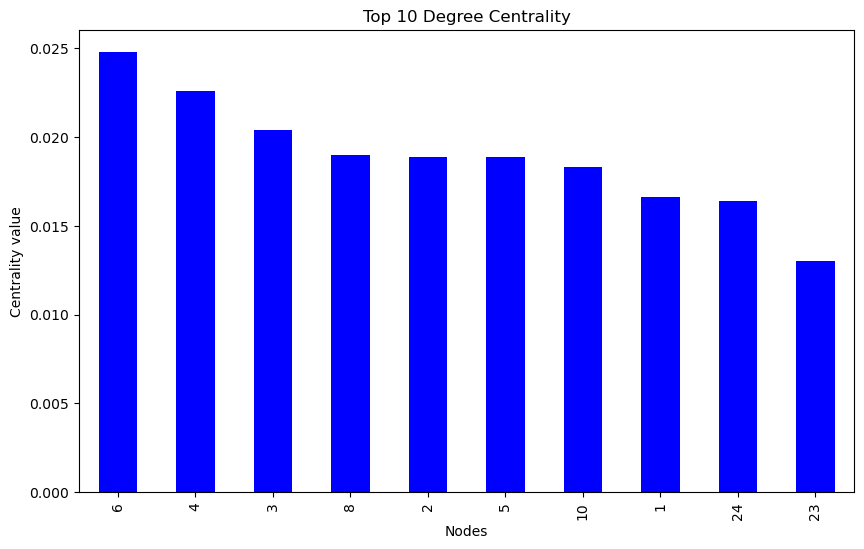

In [9]:
degree_centrality = nx.degree_centrality(G1)
sorted_degree_centrality = pd.Series(degree_centrality).sort_values(ascending=False).head(10)

# Print
print("Top 10 Degree Centrality:")
print(sorted_degree_centrality)

# Plot
plt.figure(figsize=(10, 6))
sorted_degree_centrality.plot(kind='bar', color='blue')
plt.title("Top 10 Degree Centrality")
plt.ylabel('Centrality value')
plt.xlabel('Nodes')
plt.show()

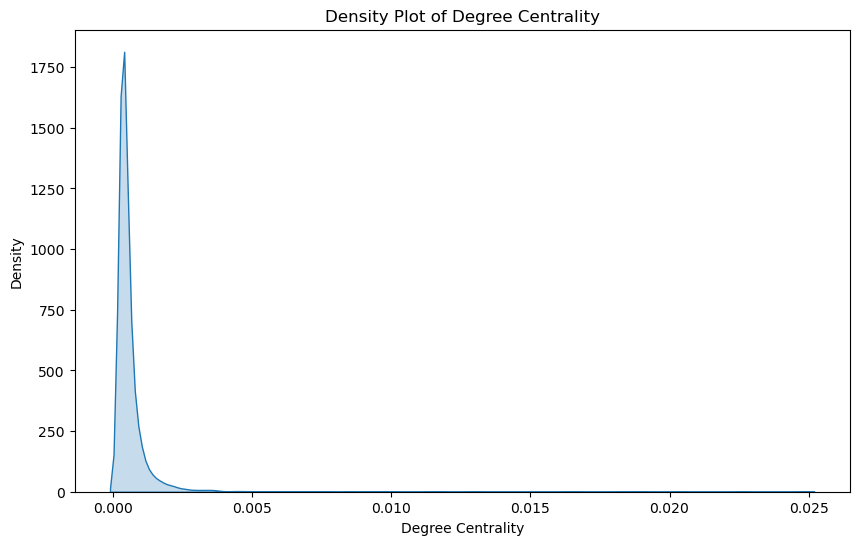

In [12]:
degree_centrality = nx.degree_centrality(G1)
degree_df = pd.Series(degree_centrality)

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(degree_df, fill=True)
plt.title('Density Plot of Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Density')
plt.show()

Top 10 Eigenvector Centrality:
6     0.307759
3     0.273469
4     0.255149
5     0.231214
2     0.222994
1     0.189300
8     0.178912
10    0.144677
24    0.113697
7     0.108706
dtype: float64


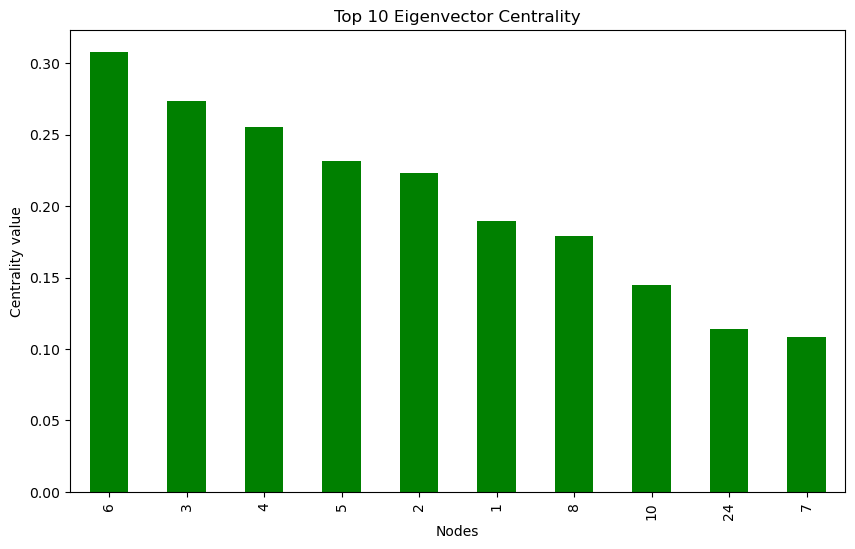

In [13]:
eigenvector_centrality = nx.eigenvector_centrality_numpy(G1)
sorted_eigenvector_centrality = pd.Series(eigenvector_centrality).sort_values(ascending=False).head(10)

# Print
print("Top 10 Eigenvector Centrality:")
print(sorted_eigenvector_centrality)

# Plot
plt.figure(figsize=(10, 6))
sorted_eigenvector_centrality.plot(kind='bar', color='green')
plt.title("Top 10 Eigenvector Centrality")
plt.ylabel('Centrality value')
plt.xlabel('Nodes')
plt.show()

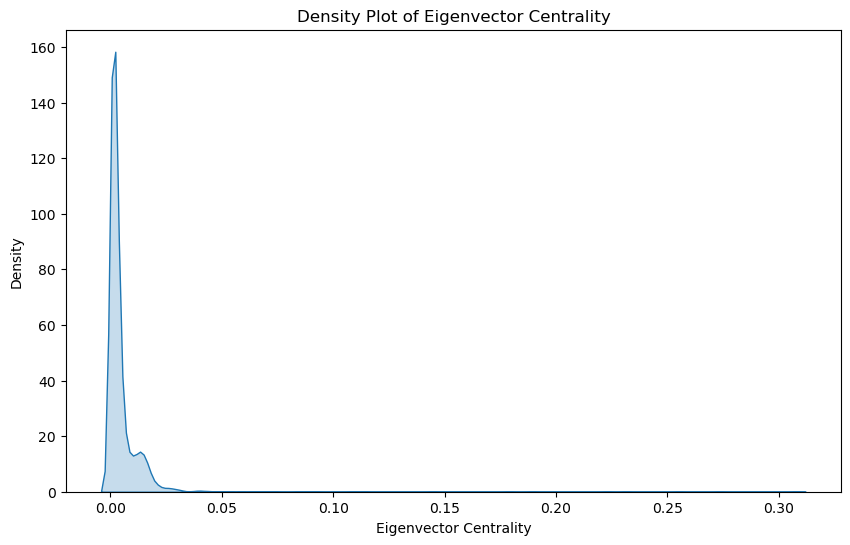

In [14]:
eigenvector_centrality = nx.eigenvector_centrality_numpy(G1)
eigenvector_df = pd.Series(eigenvector_centrality)

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(eigenvector_df, fill=True)
plt.title('Density Plot of Eigenvector Centrality')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Density')
plt.show()


Top 10 Katz Centrality:
75     0.131172
12     0.104184
79     0.080508
114    0.075607
51     0.067452
177    0.060055
33     0.045016
55     0.043730
2      0.042480
5      0.039887
dtype: float64


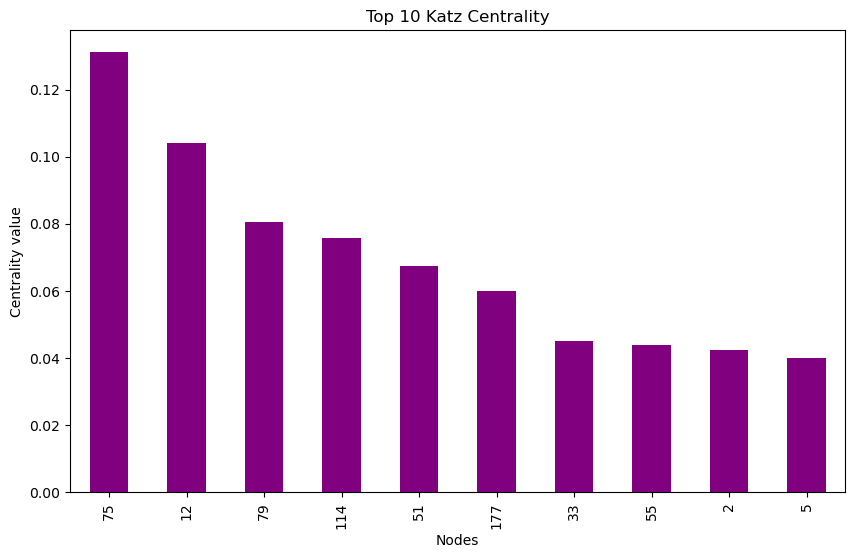

In [15]:
katz_centrality = nx.katz_centrality_numpy(G1)
sorted_katz_centrality = pd.Series(katz_centrality).sort_values(ascending=False).head(10)

# Print
print("Top 10 Katz Centrality:")
print(sorted_katz_centrality)

# Plot
plt.figure(figsize=(10, 6))
sorted_katz_centrality.plot(kind='bar', color='purple')
plt.title("Top 10 Katz Centrality")
plt.ylabel('Centrality value')
plt.xlabel('Nodes')
plt.show()


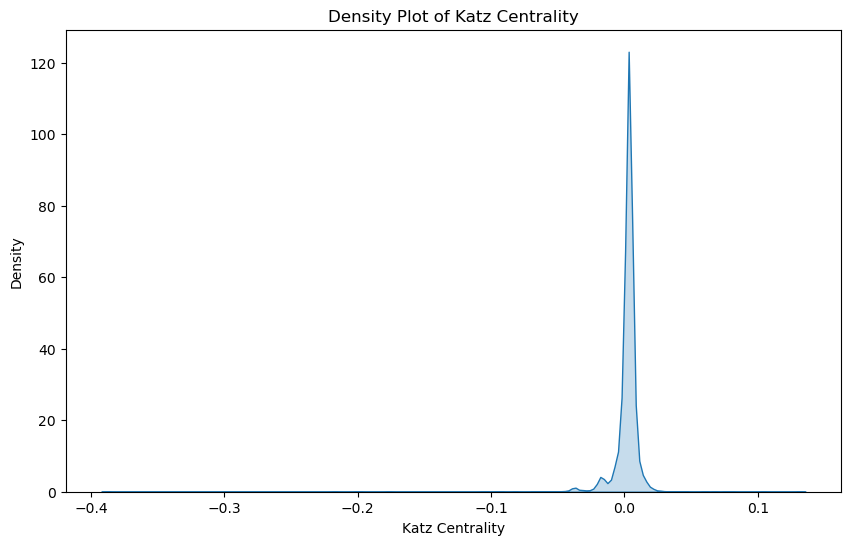

In [16]:
katz_centrality = nx.katz_centrality_numpy(G1)
katz_df = pd.Series(katz_centrality)

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(katz_df, fill=True)
plt.title('Density Plot of Katz Centrality')
plt.xlabel('Katz Centrality')
plt.ylabel('Density')
plt.show()

Top 10 PageRank Centrality:
6     0.003484
4     0.003203
3     0.002859
8     0.002701
2     0.002665
5     0.002663
10    0.002608
1     0.002355
24    0.002319
23    0.001862
dtype: float64


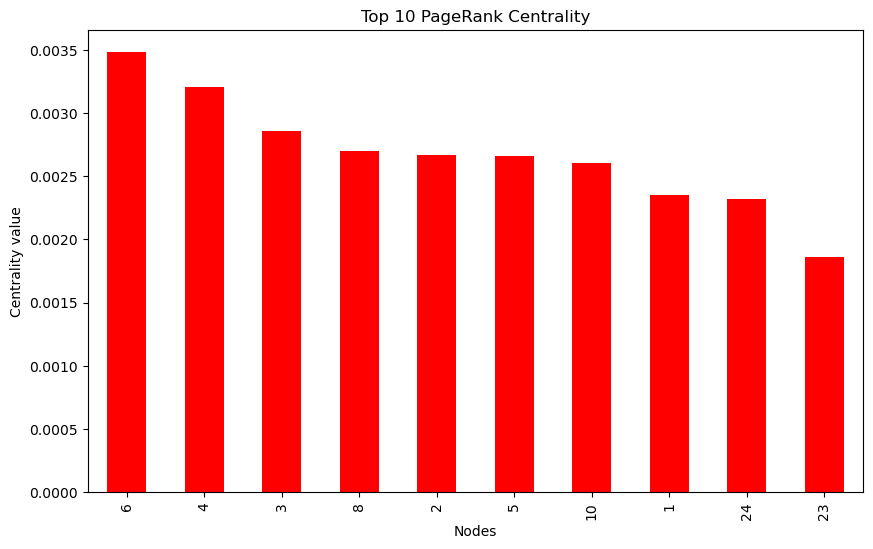

In [17]:
pagerank_centrality = nx.pagerank(G1)
sorted_pagerank_centrality = pd.Series(pagerank_centrality).sort_values(ascending=False).head(10)

# Print
print("Top 10 PageRank Centrality:")
print(sorted_pagerank_centrality)

# Plot
plt.figure(figsize=(10, 6))
sorted_pagerank_centrality.plot(kind='bar', color='red')
plt.title("Top 10 PageRank Centrality")
plt.ylabel('Centrality value')
plt.xlabel('Nodes')
plt.show()

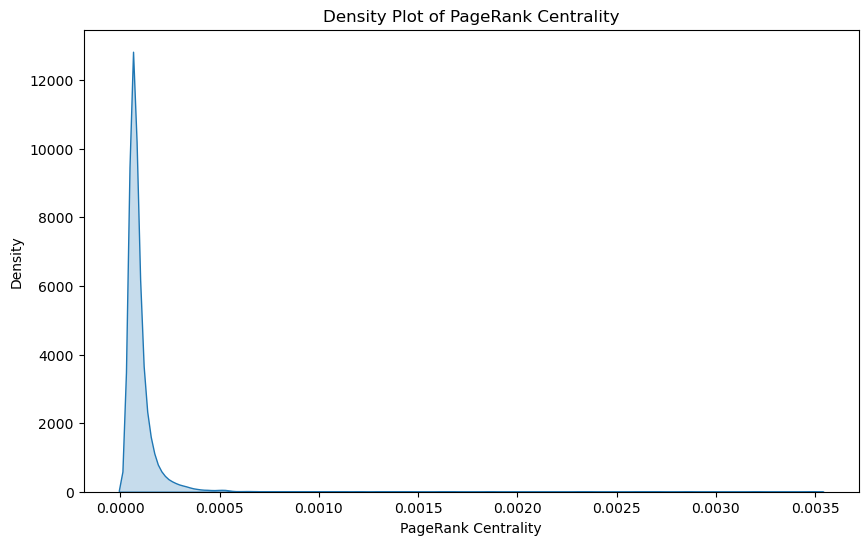

In [19]:
pagerank_centrality = nx.pagerank(G1)
pagerank_df = pd.Series(pagerank_centrality)

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(pagerank_df, fill=True)
plt.title('Density Plot of PageRank Centrality')
plt.xlabel('PageRank Centrality')
plt.ylabel('Density')
plt.show()

Top 10 Closeness Centrality:
6     0.361889
3     0.360949
5     0.356471
2     0.354537
4     0.354147
1     0.349030
8     0.344817
10    0.339064
7     0.334650
24    0.329924
dtype: float64


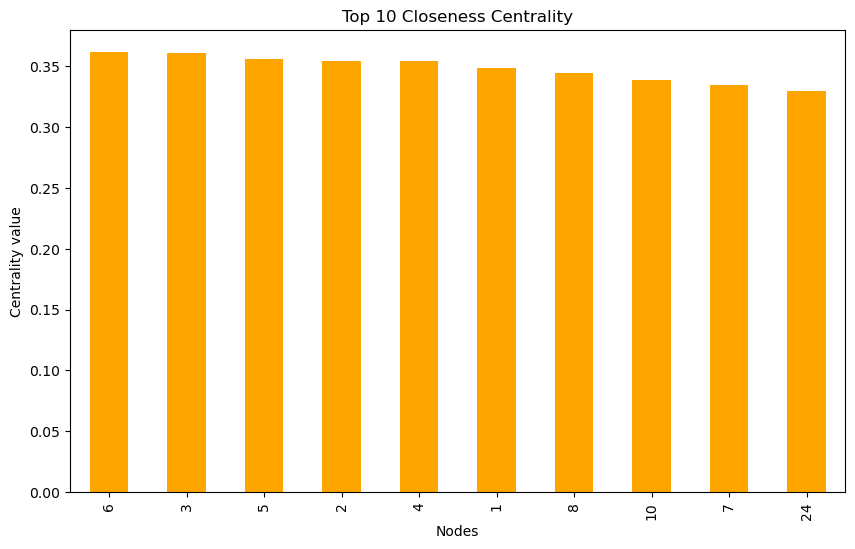

In [20]:
closeness_centrality = nx.closeness_centrality(G1)
sorted_closeness_centrality = pd.Series(closeness_centrality).sort_values(ascending=False).head(10)

# Print
print("Top 10 Closeness Centrality:")
print(sorted_closeness_centrality)

# Plot
plt.figure(figsize=(10, 6))
sorted_closeness_centrality.plot(kind='bar', color='orange')
plt.title("Top 10 Closeness Centrality")
plt.ylabel('Centrality value')
plt.xlabel('Nodes')
plt.show()

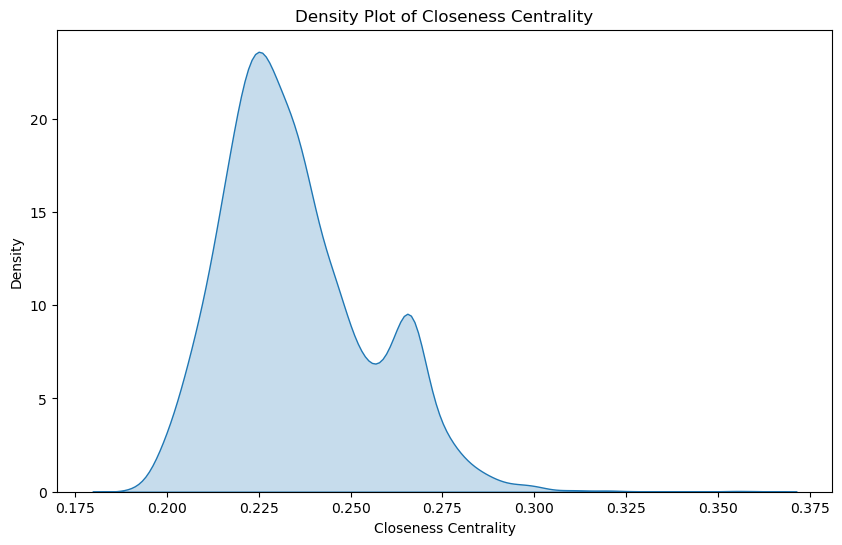

In [21]:
closeness_centrality = nx.closeness_centrality(G1)
closeness_df = pd.Series(closeness_centrality)

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(closeness_df, fill=True)
plt.title('Density Plot of Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Density')
plt.show()

Top 10 Betweenness Centrality:
6     0.100064
3     0.082328
4     0.079003
5     0.070442
2     0.067522
8     0.059743
10    0.054872
1     0.054556
24    0.042427
11    0.030782
dtype: float64


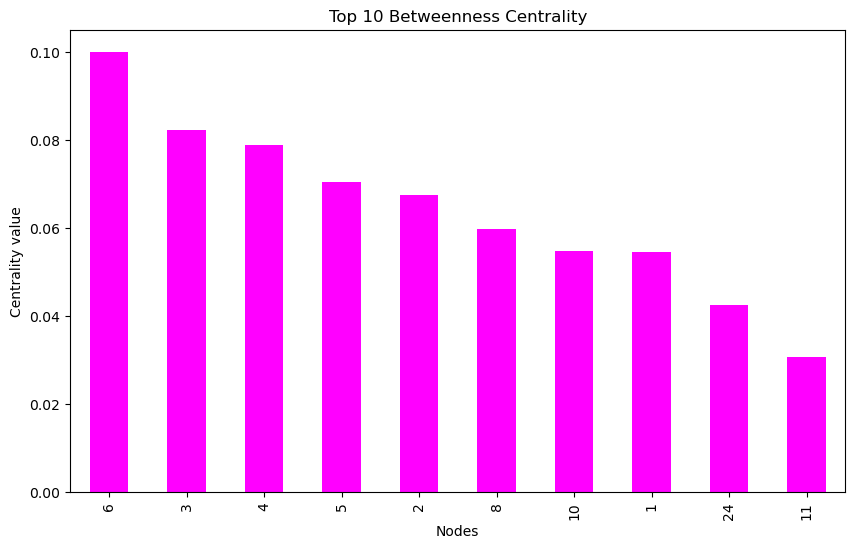

In [22]:
betweenness_centrality = nx.betweenness_centrality(G1)
sorted_betweenness_centrality = pd.Series(betweenness_centrality).sort_values(ascending=False).head(10)

# Print
print("Top 10 Betweenness Centrality:")
print(sorted_betweenness_centrality)

# Plot
plt.figure(figsize=(10, 6))
sorted_betweenness_centrality.plot(kind='bar', color='magenta')
plt.title("Top 10 Betweenness Centrality")
plt.ylabel('Centrality value')
plt.xlabel('Nodes')
plt.show()


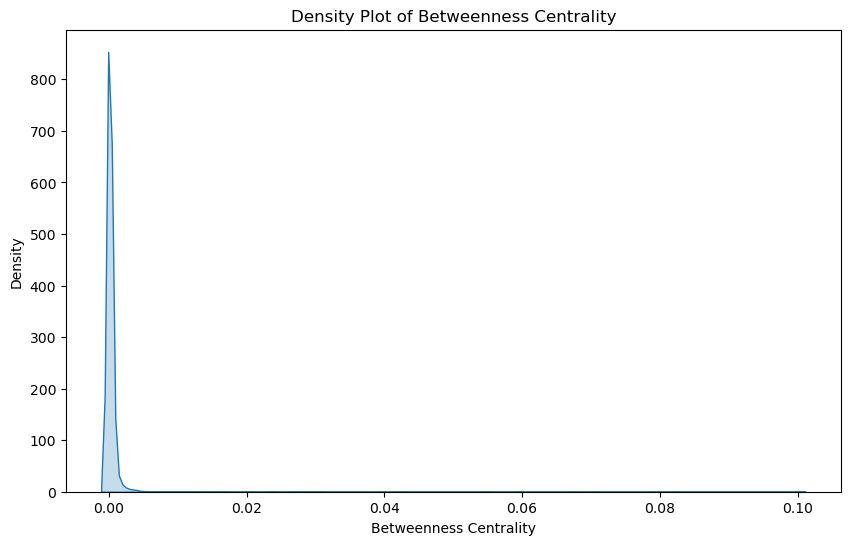

In [23]:
betweenness_centrality = nx.betweenness_centrality(G1)
betweenness_df = pd.Series(betweenness_centrality)

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(betweenness_df, fill=True)
plt.title('Density Plot of Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Density')
plt.show()

In [24]:
reciprocity_value = nx.reciprocity(G1)
print("Reciprocity of the graph:", reciprocity_value)

Reciprocity of the graph: 0.0


In [25]:
transitivity_value = nx.transitivity(G1)
print("Transitivity (Global Clustering Coefficient) of the graph:", transitivity_value)

Transitivity (Global Clustering Coefficient) of the graph: 0.002879568006859977


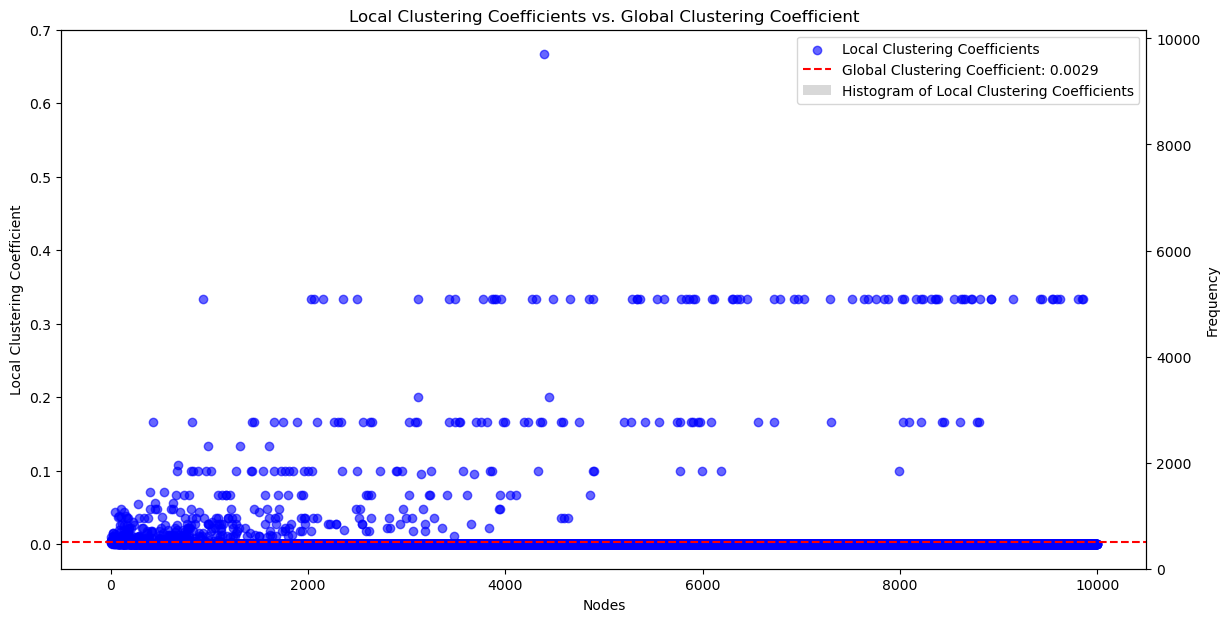

In [26]:
local_clustering = nx.clustering(G1)
global_clustering = nx.transitivity(G1)

# Creating a DataFrame from the local clustering data
local_clustering_df = pd.DataFrame(list(local_clustering.items()), columns=['Node', 'LocalClustering'])

# Set up the figure and axes for a combined plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Scatter plot for local clustering coefficients
scatter = ax1.scatter(local_clustering_df.index, local_clustering_df['LocalClustering'], alpha=0.6, color='blue', label='Local Clustering Coefficients')
ax1.set_ylabel('Local Clustering Coefficient')
ax1.set_xlabel('Nodes')
ax1.set_title('Local Clustering Coefficients vs. Global Clustering Coefficient')

# Add a horizontal line for global clustering coefficient
ax1.axhline(y=global_clustering, color='red', linestyle='--', label=f'Global Clustering Coefficient: {global_clustering:.4f}')

# Secondary axis for histogram
ax2 = ax1.twinx()
sns.histplot(local_clustering_df['LocalClustering'], bins=30, ax=ax2, color='gray', alpha=0.3, label='Histogram of Local Clustering Coefficients')
ax2.set_ylabel('Frequency')

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()

Top 10 Nodes by Local Clustering Coefficient:
4388    0.666667
4479    0.333333
5861    0.333333
4655    0.333333
3434    0.333333
6303    0.333333
8638    0.333333
934     0.333333
6308    0.333333
3774    0.333333
dtype: float64


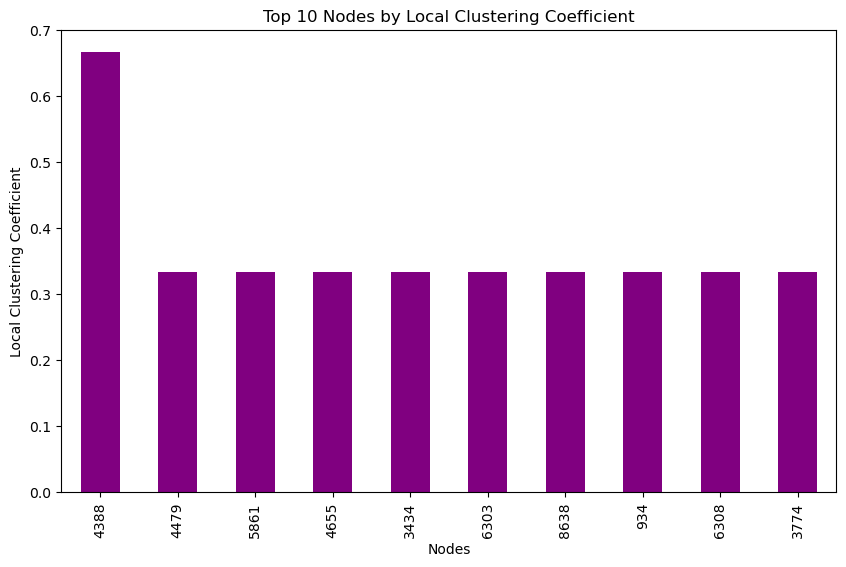

In [27]:
local_clustering_df = pd.Series(local_clustering).sort_values(ascending=False).head(10)
print("Top 10 Nodes by Local Clustering Coefficient:")
print(local_clustering_df)

# Plotting top 10 local clustering coefficients
plt.figure(figsize=(10, 6))
local_clustering_df.plot(kind='bar', color='purple')
plt.title("Top 10 Nodes by Local Clustering Coefficient")
plt.ylabel('Local Clustering Coefficient')
plt.xlabel('Nodes')
plt.show()

In [31]:
# G = nx.Graph()
# G2=nx.Graph()
# with open("facebook_combined.txt", "r") as file:
#     for line in file:
#         node1, node2 = line.strip().split()  # Assuming nodes are separated by space
#         G.add_edge(node1, node2)
G = nx.Graph()
G2 = nx.Graph()

with open("facebook_combined.txt", "r") as file:
    for line in file:
        # Split the line into node1 and node2, assuming nodes are separated by space
        nodes = line.strip().split()
        
        # Check if the line contains exactly two nodes
        if len(nodes) == 2:
            node1, node2 = nodes
            G.add_edge(node1, node2)
        else:
            print(f"Ignoring line: {line.strip()}")
# Open the file and read lines
with open("p2p-Gnutella08.txt", "r") as file:
    for line in file:
        # Split the line into node1 and node2, assuming nodes are separated by space
        nodes = line.strip().split()
        
        # Check if the line contains exactly two nodes
        if len(nodes) == 2:
            node1, node2 = nodes
            G2.add_edge(node1, node2)
        else:
            print(f"Ignoring line: {line.strip()}")


Ignoring line: # Directed graph (each unordered pair of nodes is saved once): p2p-Gnutella08.txt
Ignoring line: # Directed Gnutella P2P network from August 8 2002
Ignoring line: # Nodes: 6301 Edges: 20777
Ignoring line: # FromNodeId	ToNodeId


In [32]:
giant_component = max(nx.connected_components(G1), key=len)
giant_component2 = max(nx.connected_components(G), key=len)
giant_component3 = max(nx.connected_components(G2), key=len)

In [33]:
giant_component_subgraph = G1.subgraph(giant_component)
giant_component_subgraph2 = G.subgraph(giant_component2)
giant_component_subgraph3 = G2.subgraph(giant_component3)

In [34]:
num_nodes_giant = giant_component_subgraph.number_of_nodes()
num_edges_giant = giant_component_subgraph.number_of_edges()
avg_degree_giant = sum(dict(giant_component_subgraph.degree()).values()) / num_nodes_giant
global_clustering_coefficient_giant = nx.average_clustering(giant_component_subgraph)

In [35]:
num_nodes_giant2 = giant_component_subgraph2.number_of_nodes()
num_edges_giant2 = giant_component_subgraph2.number_of_edges()
avg_degree_giant2 = sum(dict(giant_component_subgraph2.degree()).values()) / num_nodes_giant2
global_clustering_coefficient_giant2 = nx.average_clustering(giant_component_subgraph2)

In [36]:
num_nodes_giant3 = giant_component_subgraph3.number_of_nodes()
num_edges_giant3 = giant_component_subgraph3.number_of_edges()
avg_degree_giant3 = sum(dict(giant_component_subgraph3.degree()).values()) / num_nodes_giant3
global_clustering_coefficient_giant3 = nx.average_clustering(giant_component_subgraph3)

In [37]:
print("\nBasic Statistics for Giant Component of BA network:")
print("Number of Nodes (Giant Component):", num_nodes_giant)
print("Number of Edges (Giant Component):", num_edges_giant)
print("Average Degree (Giant Component):", avg_degree_giant)
print("Global Clustering Coefficient (Giant Component):", global_clustering_coefficient_giant)



Basic Statistics for Giant Component of BA network:
Number of Nodes (Giant Component): 10000
Number of Edges (Giant Component): 29994
Average Degree (Giant Component): 5.9988
Global Clustering Coefficient (Giant Component): 0.004833214427314665


In [38]:
print("\nBasic Statistics for Giant Component of 2nd network:")
print("Number of Nodes (Giant Component):", num_nodes_giant2)
print("Number of Edges (Giant Component):", num_edges_giant2)
print("Average Degree (Giant Component):", avg_degree_giant2)
print("Global Clustering Coefficient (Giant Component):", global_clustering_coefficient_giant2)


Basic Statistics for Giant Component of 2nd network:
Number of Nodes (Giant Component): 4039
Number of Edges (Giant Component): 88234
Average Degree (Giant Component): 43.69101262688784
Global Clustering Coefficient (Giant Component): 0.6055467186200876


In [39]:
print("\nBasic Statistics for Giant Component of 3rd network:")
print("Number of Nodes (Giant Component):", num_nodes_giant3)
print("Number of Edges (Giant Component):", num_edges_giant3)
print("Average Degree (Giant Component):", avg_degree_giant3)
print("Global Clustering Coefficient (Giant Component):", global_clustering_coefficient_giant3)



Basic Statistics for Giant Component of 3rd network:
Number of Nodes (Giant Component): 6299
Number of Edges (Giant Component): 20776
Average Degree (Giant Component): 6.596602635338943
Global Clustering Coefficient (Giant Component): 0.010871372617495094


<Figure size 1200x800 with 0 Axes>

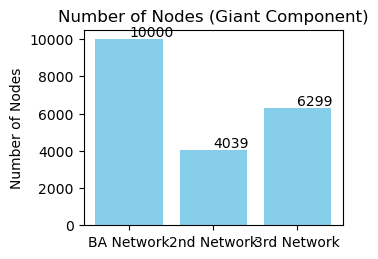

In [60]:
networks = ['BA Network', '2nd Network', '3rd Network']
num_nodes_giants = [num_nodes_giant, num_nodes_giant2, num_nodes_giant3]
num_edges_giants = [num_edges_giant, num_edges_giant2, num_edges_giant3]
avg_degrees_giants = [avg_degree_giant, avg_degree_giant2, avg_degree_giant3]
global_clustering_coefficients_giants = [global_clustering_coefficient_giant, global_clustering_coefficient_giant2, global_clustering_coefficient_giant3]
plt.figure(figsize=(12, 8))
plt.show()
# Number of Nodes
plt.subplot(2, 2, 1)
bars = plt.bar(networks, num_nodes_giants, color='skyblue')
plt.title('Number of Nodes (Giant Component)')
plt.ylabel('Number of Nodes')

# Adding labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')

plt.tight_layout()
plt.show()


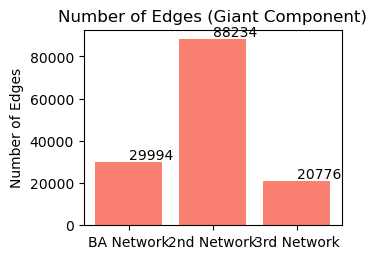

In [61]:
# Number of Edges
plt.subplot(2, 2, 2)
bars = plt.bar(networks, num_edges_giants, color='salmon')
plt.title('Number of Edges (Giant Component)')
plt.ylabel('Number of Edges')

# Adding labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')

plt.tight_layout()
plt.show()


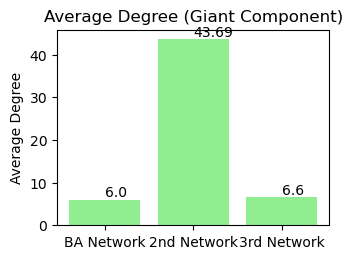

In [62]:
# Average Degree
plt.subplot(2, 2, 3)
bars = plt.bar(networks, avg_degrees_giants, color='lightgreen')
plt.title('Average Degree (Giant Component)')
plt.ylabel('Average Degree')

# Adding labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()


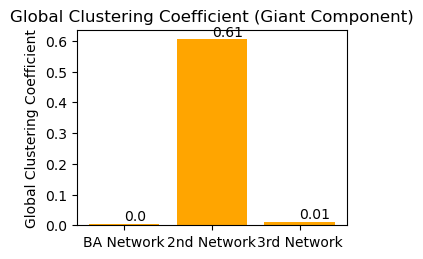

In [59]:
# Global Clustering Coefficient
plt.subplot(2, 2, 4)
bars = plt.bar(networks, global_clustering_coefficients_giants, color='orange')
plt.title('Global Clustering Coefficient (Giant Component)')
plt.ylabel('Global Clustering Coefficient')

# Adding labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()

In [46]:
def icm_simulation(G):
    max_nodes = 0
    steps = 0

    # Initialize active nodes (initial seed)
    active_nodes = set(np.random.choice(list(G.nodes()), size=1))

    # Continue until no more nodes can be activated
    while True:
        steps += 1
        # Nodes activated in this step
        newly_activated = set()
        # Iterate over active nodes
        for node in list(active_nodes):
            # Iterate over neighbors of the active node
            for neighbor in G.neighbors(node):
                # If the neighbor is not already active
                if neighbor not in active_nodes:
                    newly_activated.add(neighbor)
        # Add newly activated nodes to the set of active nodes
        active_nodes |= newly_activated
        # Update the maximum number of nodes reached
        if len(active_nodes) > max_nodes:
            max_nodes = len(active_nodes)
        # If no more nodes can be activated, stop the simulation
        if len(newly_activated) == 0:
            break

    return steps, max_nodes

In [47]:
steps1, max_nodes1 = icm_simulation(G1)
steps2, max_nodes2 = icm_simulation(G)
steps3, max_nodes3 = icm_simulation(G2)
# Display results
print("Number of steps required and maximum number of nodes reached for each network:")
print("1. Scale-free network: Steps =", steps1, ", Max Nodes =", max_nodes1)
print("2. Second network: Steps =", steps2, ", Max Nodes =", max_nodes2)
print("3. Third network: Steps =", steps3, ", Max Nodes =", max_nodes3)

Number of steps required and maximum number of nodes reached for each network:
1. Scale-free network: Steps = 7 , Max Nodes = 10000
2. Second network: Steps = 7 , Max Nodes = 4039
3. Third network: Steps = 9 , Max Nodes = 6299


In [48]:
def icm_simulation_average(G, num_iterations):
    total_steps = 0

    for _ in range(num_iterations):
        steps, _ = icm_simulation(G)
        total_steps += steps

    average_steps = total_steps / num_iterations

    return average_steps

num_iterations = 10

In [49]:
# Perform multiple iterations of ICM simulation and calculate the average number of steps for each network
average_steps1 = icm_simulation_average(G1, num_iterations)
average_steps2 = icm_simulation_average(G, num_iterations)
average_steps3 = icm_simulation_average(G2, num_iterations)

# Display the average number of steps required for each network
print("Average number of steps required for each network:")
print("1. Scale-free network:", average_steps1)
print("2. Second network:", average_steps2)
print("3. Third network:", average_steps3)

Average number of steps required for each network:
1. Scale-free network: 6.9
2. Second network: 7.3
3. Third network: 8.0


In [50]:
def assign_random_probabilities(G):
    for node in G.nodes():
        outgoing_edges = list(G.edges(node))
        # Generate random probabilities for outgoing edges
        probabilities = np.random.uniform(0, 1, len(outgoing_edges))
        # Normalize probabilities so that they sum up to 1
        probabilities /= np.sum(probabilities)
        # Assign probabilities to edges
        for i, (source, target) in enumerate(outgoing_edges):
            G[source][target]['p'] = probabilities[i]

In [51]:
def icm_simulation2(G):
    max_nodes = 0
    steps = 0

    # Initialize active nodes (initial seed)
    active_nodes = set(np.random.choice(list(G.nodes()), size=1))

    # Continue until no more nodes can be activated
    while True:
        steps += 1
        # Nodes activated in this step
        newly_activated = set()
        # Iterate over active nodes
        for node in list(active_nodes):
            # Iterate over neighbors of the active node
            for neighbor in G.neighbors(node):
                # If the neighbor is not already active and it gets activated with probability p
                if neighbor not in active_nodes and np.random.random() < G[node][neighbor]['p']:
                    newly_activated.add(neighbor)
        # Add newly activated nodes to the set of active nodes
        active_nodes |= newly_activated
        # Update the maximum number of nodes reached
        if len(active_nodes) > max_nodes:
            max_nodes = len(active_nodes)
        # If no more nodes can be activated, stop the simulation
        if len(newly_activated) == 0:
            break

    return steps, max_nodes

In [52]:
def icm_simulation_average2(G, num_iterations):
    total_steps = 0

    for _ in range(num_iterations):
        steps, _ = icm_simulation2(G)
        total_steps += steps

    average_steps = total_steps / num_iterations

    return average_steps

Average number of steps required for each network with random activation probabilities:
1. Scale-free network: 12.7
2. Second network: 13.5
3. Third network: 21.4


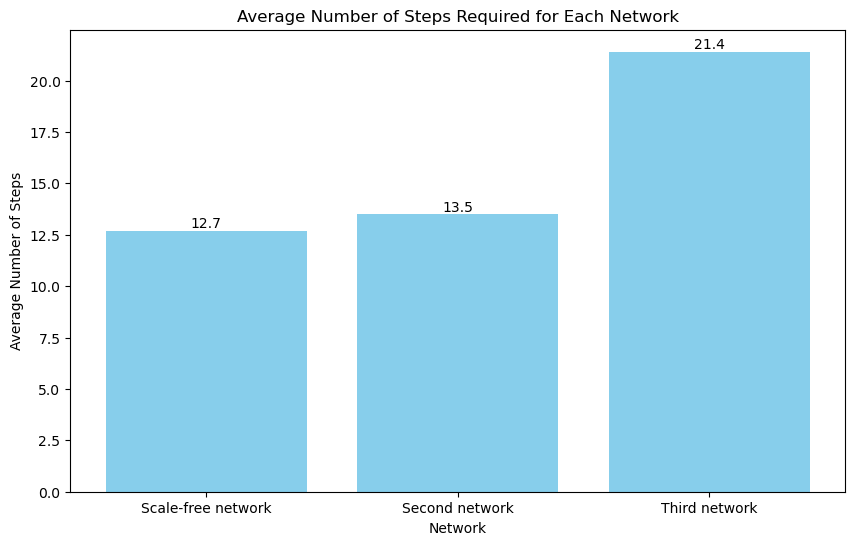

In [63]:
# Assign random activation probabilities to edges in each network
average_steps1 = icm_simulation_average2(G1, num_iterations)
average_steps2 = icm_simulation_average2(G, num_iterations)
average_steps3 = icm_simulation_average2(G2, num_iterations)

# Display the average number of steps required for each network
print("Average number of steps required for each network with random activation probabilities:")
print("1. Scale-free network:", average_steps1)
print("2. Second network:", average_steps2)
print("3. Third network:", average_steps3)

# Plotting the results
networks = ['Scale-free network', 'Second network', 'Third network']
average_steps = [average_steps1, average_steps2, average_steps3]

plt.figure(figsize=(10, 6))
plt.bar(networks, average_steps, color='skyblue')
plt.title('Average Number of Steps Required for Each Network')
plt.xlabel('Network')
plt.ylabel('Average Number of Steps')

# Adding labels above each bar
for i, value in enumerate(average_steps):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()